In [5]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from functools import lru_cache

@lru_cache(maxsize=None)
def fibonacci_recursive(n):
    if n <= 1:
        return n
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

def fibonacci_iterative(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

def measure_time(func, n):
    start_time = time.time()
    func(n)
    execution_time = time.time() - start_time
    return execution_time


In [6]:
file_name = "datamahasiswa.csv"
try:
    data = pd.read_csv(file_name, header=0)
    print("Kolom tersedia dalam file:", data.columns.tolist())
except FileNotFoundError:
    print(f"File '{file_name}' tidak ditemukan.")
    exit()

# Memastikan kolom "Nilai" ada di file
if "Nilai" not in data.columns:
    print("Kolom 'Nilai' tidak ditemukan dalam file.")
    exit()

# Mengambil nilai dari kolom "Nilai" dan memastikan tipe data numerik
try:
    n_values = data["Nilai"].dropna().astype(int).tolist()
    print("Nilai dari kolom 'Nilai':", n_values)
except ValueError:
    print("Kolom 'Nilai' harus berisi angka yang valid.")
    exit()


Kolom tersedia dalam file: ['ID', 'Nama', 'Umur', 'Gender', 'Nilai', 'Matkul', 'Tanggal', 'UTS', 'UAS']
Nilai dari kolom 'Nilai': [85, 77, 90, 60, 77, 85, 90, 67, 75, 82, 83, 90, 87, 89, 86, 79, 76, 77, 86, 84, 78, 87, 80, 91, 92, 80, 83, 78, 86, 90, 79, 85, 74, 85, 91, 81, 81, 78, 80, 77, 87, 80, 84, 83, 83, 84, 88, 76, 86, 80, 92, 78, 90, 88, 89, 88, 91, 83, 76, 86, 73, 81, 76, 80, 80, 86, 77, 90, 85, 85, 75, 81, 78, 76, 86, 80, 83, 82, 75, 78, 85, 81, 87, 81, 81, 84, 85, 77, 72, 81, 84, 77, 90, 84, 87, 81, 82, 80, 72, 94]


In [7]:
n_max_limit = 10000
n_values_filtered = [n for n in n_values if n <= n_max_limit]
if not n_values_filtered:
    print(f"Tidak ada nilai dalam rentang 0 hingga {n_max_limit}.")
    exit()

print("Nilai setelah filtering:", n_values_filtered)


Nilai setelah filtering: [85, 77, 90, 60, 77, 85, 90, 67, 75, 82, 83, 90, 87, 89, 86, 79, 76, 77, 86, 84, 78, 87, 80, 91, 92, 80, 83, 78, 86, 90, 79, 85, 74, 85, 91, 81, 81, 78, 80, 77, 87, 80, 84, 83, 83, 84, 88, 76, 86, 80, 92, 78, 90, 88, 89, 88, 91, 83, 76, 86, 73, 81, 76, 80, 80, 86, 77, 90, 85, 85, 75, 81, 78, 76, 86, 80, 83, 82, 75, 78, 85, 81, 87, 81, 81, 84, 85, 77, 72, 81, 84, 77, 90, 84, 87, 81, 82, 80, 72, 94]


In [8]:
# Running time untuk rekursif (90)
recursive_limit = 90
recursive_n = [n for n in n_values_filtered if n <= recursive_limit]
recursive_times = [measure_time(fibonacci_recursive, n) for n in recursive_n]

# Running time untuk iteratif
iterative_times = [measure_time(fibonacci_iterative, n) for n in n_values_filtered]


In [10]:
from prettytable import PrettyTable

# Membuat DataFrame untuk menyimpan hasil waktu eksekusi
execution_data = {
    "Nilai Fibonacci (n)": n_values_filtered,
    "Waktu Rekursif (detik)": [measure_time(fibonacci_recursive, n) if n <= recursive_limit else None for n in n_values_filtered],
    "Waktu Iteratif (detik)": iterative_times,
}

# Konversi ke DataFrame
execution_df = pd.DataFrame(execution_data)

# Fungsi untuk menampilkan tabel eksekusi dalam kelompok 20 baris
def print_execution_table_in_chunks(df, chunk_size=20):
    num_rows = len(df)
    for start in range(0, num_rows, chunk_size):
        end = min(start + chunk_size, num_rows)
        chunk = df.iloc[start:end]

        # Membuat tabel untuk setiap grup
        table = PrettyTable()
        table.field_names = ["Nilai Fibonacci (n)", "Waktu Rekursif (detik)", "Waktu Iteratif (detik)"]

        for _, row in chunk.iterrows():
            table.add_row([row["Nilai Fibonacci (n)"], row["Waktu Rekursif (detik)"], row["Waktu Iteratif (detik)"]])

        print("\nTabel Waktu Eksekusi (Baris {}-{}):".format(start + 1, end))
        print(table)

# Panggil fungsi untuk menampilkan tabel PrettyTable secara terkelompok
print_execution_table_in_chunks(execution_df, chunk_size=20)

# Menyimpan DataFrame ke file CSV untuk referensi
execution_df.to_csv("execution_times.csv", index=False)
print("\nData waktu eksekusi disimpan ke 'execution_times.csv'.")



Tabel Waktu Eksekusi (Baris 1-20):
+---------------------+------------------------+------------------------+
| Nilai Fibonacci (n) | Waktu Rekursif (detik) | Waktu Iteratif (detik) |
+---------------------+------------------------+------------------------+
|         85.0        | 1.430511474609375e-06  |  1.33514404296875e-05  |
|         77.0        | 7.152557373046875e-07  | 9.298324584960938e-06  |
|         90.0        |  4.76837158203125e-07  | 1.049041748046875e-05  |
|         60.0        | 2.384185791015625e-07  | 6.9141387939453125e-06 |
|         77.0        | 2.384185791015625e-07  | 8.821487426757812e-06  |
|         85.0        | 2.384185791015625e-07  | 9.775161743164062e-06  |
|         90.0        | 2.384185791015625e-07  | 9.298324584960938e-06  |
|         67.0        | 2.384185791015625e-07  | 8.106231689453125e-06  |
|         75.0        | 7.152557373046875e-07  | 8.344650268554688e-06  |
|         82.0        |  4.76837158203125e-07  | 2.1219253540039062e-05 |
| 

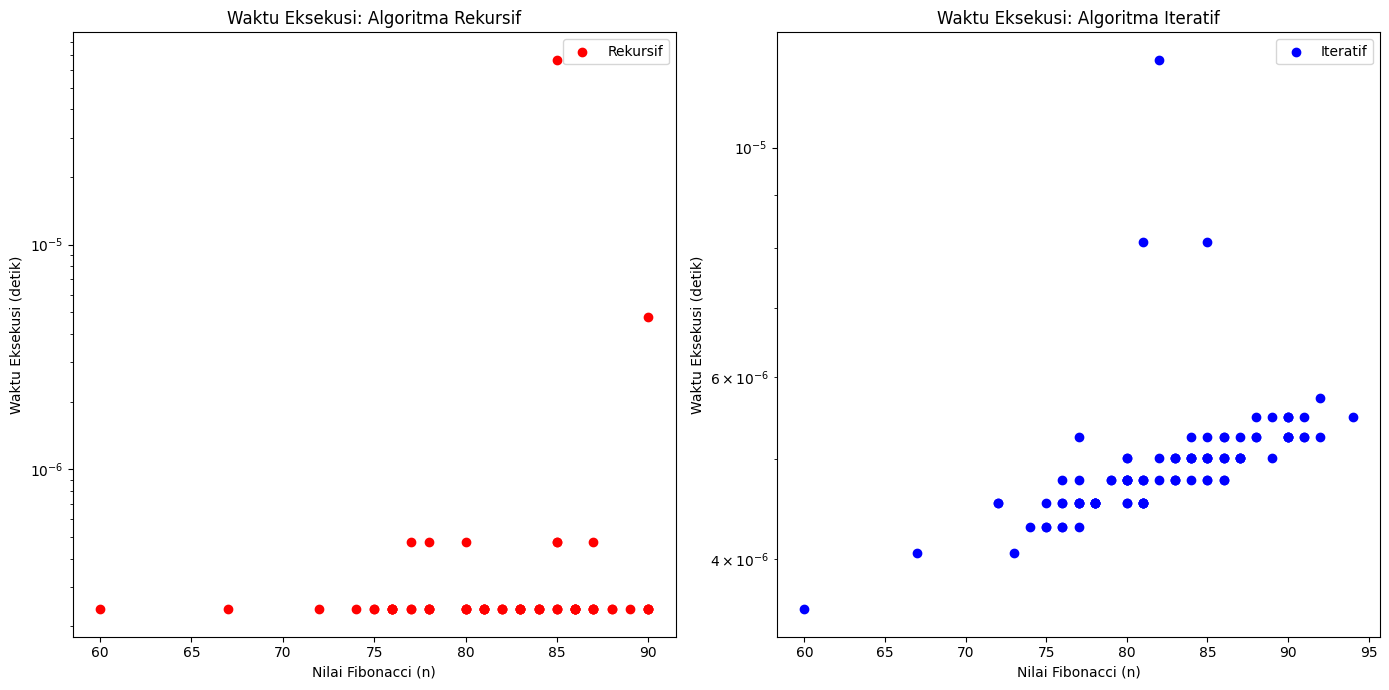

In [6]:
plt.figure(figsize=(14, 7))

# Plot rekursif
plt.subplot(1, 2, 1)
if recursive_n:
    plt.scatter(recursive_n, recursive_times, label="Rekursif", color="red")
    plt.xlabel("Nilai Fibonacci (n)")
    plt.ylabel("Waktu Eksekusi (detik)")
    plt.title("Waktu Eksekusi: Algoritma Rekursif")
    plt.yscale("log")  # Skala log untuk visualisasi data eksponensial
    plt.legend()
else:
    plt.text(0.5, 0.5, "Tidak ada data untuk rekursif (n ≤ 90)", ha="center", va="center")
    plt.axis("off")

# Plot iteratif
plt.subplot(1, 2, 2)
plt.scatter(n_values_filtered, iterative_times, label="Iteratif", color="blue")
plt.xlabel("Nilai Fibonacci (n)")
plt.ylabel("Waktu Eksekusi (detik)")
plt.title("Waktu Eksekusi: Algoritma Iteratif")
plt.yscale("log")  # Skala log untuk visualisasi perubahan kecil
plt.legend()

plt.tight_layout()
plt.show()


- Grafik rekursi (kiri) Metode rekursif menghitung Fibonacci dengan memanggil fungsi secara berulang untuk nilai sebelumnya. Meskipun mudah dipahami, cara ini sangat tidak efisien karena banyak perhitungan yang diulang, terutama untuk nilai n n besar. Hal ini membuat waktu eksekusinya meningkat secara eksponensial, seperti yang terlihat pada grafik kiri di mana waktu eksekusi melonjak drastis.

- Grafik iteratif (kanan) Metode iteratif menggunakan perulangan untuk menghitung Fibonacci secara langsung tanpa pengulangan perhitungan. Dengan kompleksitas linier (𝑂(𝑛) O(n)), metode ini jauh lebih cepat dan efisien. Grafik kanan menunjukkan bahwa waktu eksekusi meningkat perlahan, membuat metode ini ideal untuk nilai n yang besar.

-- Kesimpulan

Metode rekursif dan iteratif memiliki efektivitas yang berbeda dalam menghitung deret Fibonacci. Metode rekursif, meskipun sederhana, sangat tidak efisien karena memiliki kompleksitas eksponensial (O(2𝑛)O(2 n)) dan waktu eksekusi yang meningkat tajam seiring bertambahnya n n. Sebaliknya, metode iteratif jauh lebih efektif, dengan kompleksitas linier ((n)O(n)) yang membuatnya lebih cepat dan efisien, terutama untuk nilai n n yang besar. Oleh karena itu, metode iteratif adalah pilihan yang lebih praktis untuk aplikasi yang membutuhkan kecepatan dan efisiensi.

In [7]:
print("Analisis Kompleksitas:")
print("- Algoritma Rekursif: O(2^n) karena melakukan percabangan eksponensial.")
print("- Algoritma Iteratif: O(n) karena melakukan iterasi linear terhadap n.")


Analisis Kompleksitas:
- Algoritma Rekursif: O(2^n) karena melakukan percabangan eksponensial.
- Algoritma Iteratif: O(n) karena melakukan iterasi linear terhadap n.
